# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | thinadhoo
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | holbaek
Processing Record 7 of Set 1 | kosh-agach
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | dongning
Processing Record 11 of Set 1 | haiku-pauwela
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | mocimboa
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | saudarkrokur
Processing Record 21 of Set 1 | pangoa
Processing Record 22 of Set 1 | codring

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,65.84,93,75,3.44,US,1717471450
1,port-aux-francais,-49.3500,70.2167,34.79,84,97,37.92,TF,1717471451
2,thinadhoo,0.5333,72.9333,83.12,76,4,8.16,MV,1717471270
3,puerto natales,-51.7236,-72.4875,26.64,92,99,2.71,CL,1717471454
4,punta arenas,-53.1500,-70.9167,32.11,93,0,5.75,CL,1717471455


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,65.84,93,75,3.44,US,1717471450
1,port-aux-francais,-49.3500,70.2167,34.79,84,97,37.92,TF,1717471451
2,thinadhoo,0.5333,72.9333,83.12,76,4,8.16,MV,1717471270
3,puerto natales,-51.7236,-72.4875,26.64,92,99,2.71,CL,1717471454
4,punta arenas,-53.1500,-70.9167,32.11,93,0,5.75,CL,1717471455


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

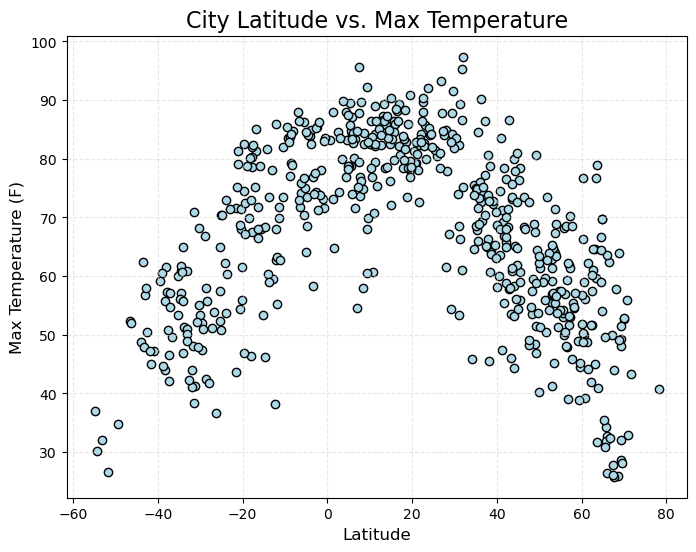

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolor="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("City Latitude vs. Max Temperature", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

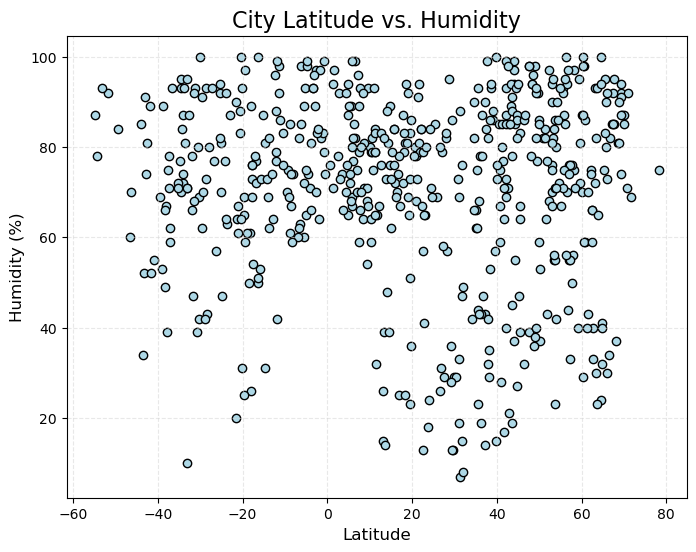

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolor="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

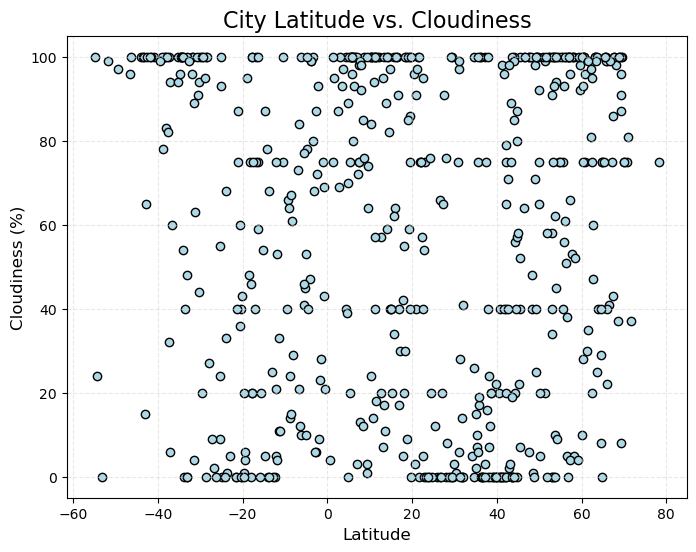

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolor="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

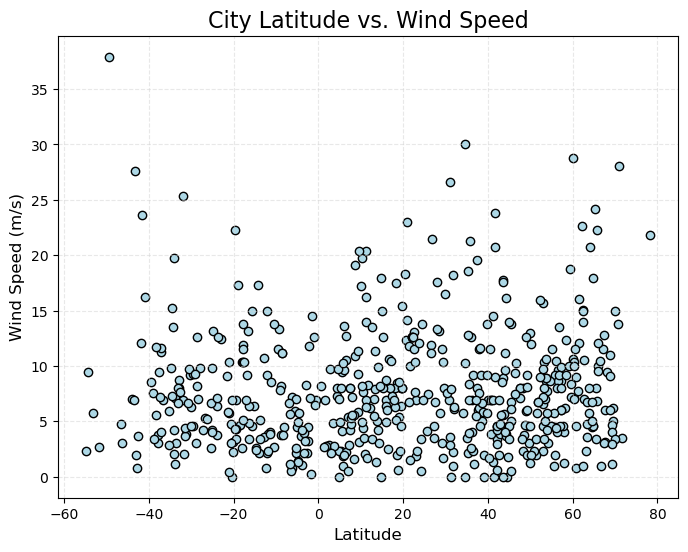

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, facecolor="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregress_plot (x, y, x_label, y_label):
    # Plot values
    x_values = x
    y_values = y
    
    # Linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Identify location for plot annotation - Middle of X and Upper half of Y
    anno_x = x_values.min() + 0.5 * (x_values.max() - x_values.min())
    anno_y = y_values.min() + 0.8 * (y_values.max() - y_values.min())

    # Create the plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, (anno_x, anno_y), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,65.84,93,75,3.44,US,1717471450
2,thinadhoo,0.5333,72.9333,83.12,76,4,8.16,MV,1717471270
5,holbaek,55.7167,11.7167,52.99,93,100,1.01,DK,1717471456
6,kosh-agach,50.0000,88.6667,40.30,86,65,13.00,RU,1717471457
8,anadyr,64.7500,177.4833,54.10,32,0,17.90,RU,1717471459


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,34.79,84,97,37.92,TF,1717471451
3,puerto natales,-51.7236,-72.4875,26.64,92,99,2.71,CL,1717471454
4,punta arenas,-53.1500,-70.9167,32.11,93,0,5.75,CL,1717471455
7,grytviken,-54.2811,-36.5092,30.22,78,24,9.42,GS,1717471458
11,margaret river,-33.9500,115.0667,64.99,72,54,7.14,AU,1717471463


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.766924192706082


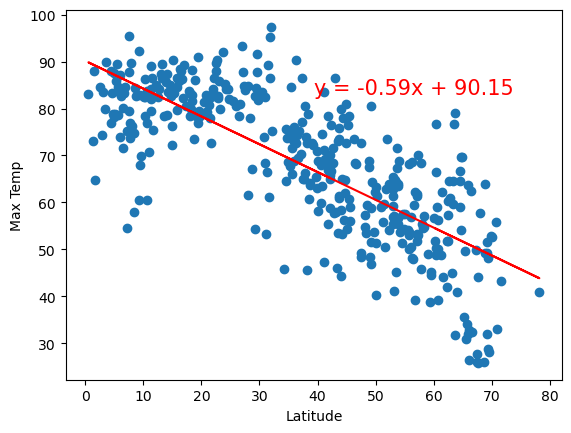

In [15]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r-value is: 0.7548263410803687


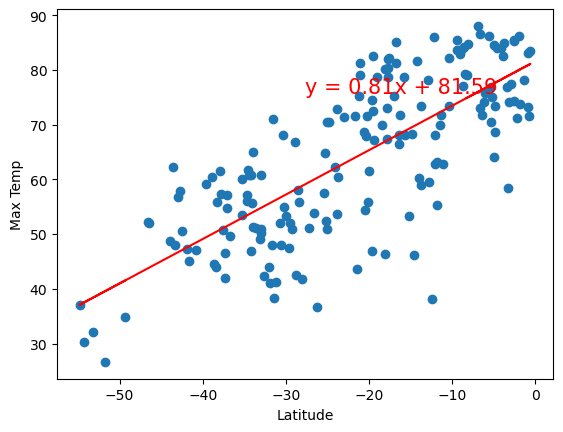

In [16]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** There is a linear relationship between latitude and max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.022140505348452823


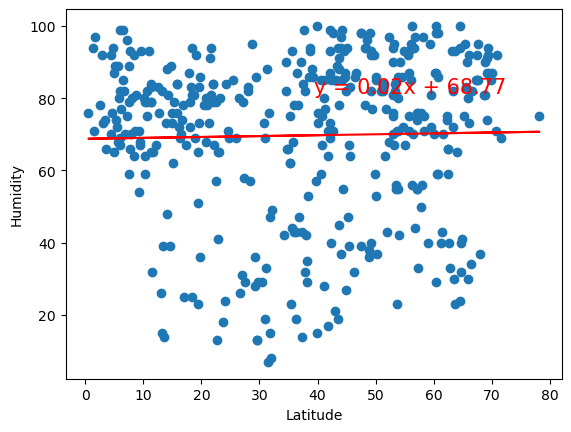

In [17]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r-value is: 0.11872740089760847


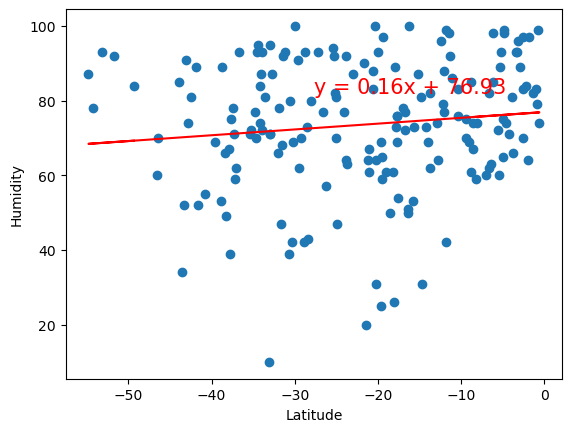

In [18]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** There is a weak linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02483898989755613


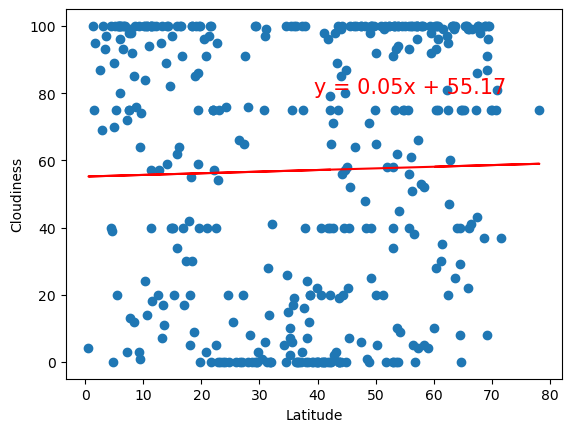

In [19]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r-value is: -0.2926638543955814


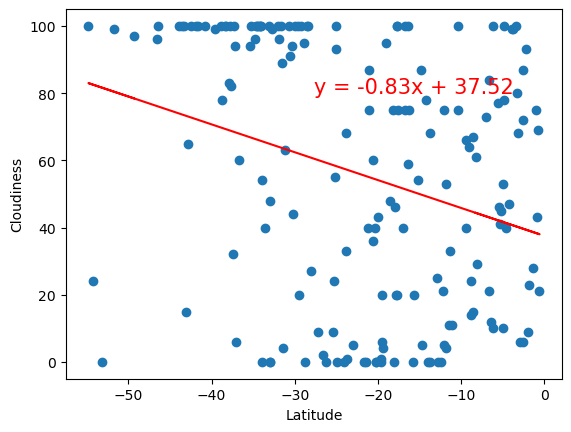

In [20]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** There is not much of a relationship with the Northern Hemisphere, but a strong negative relationship with the Southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05966016375592195


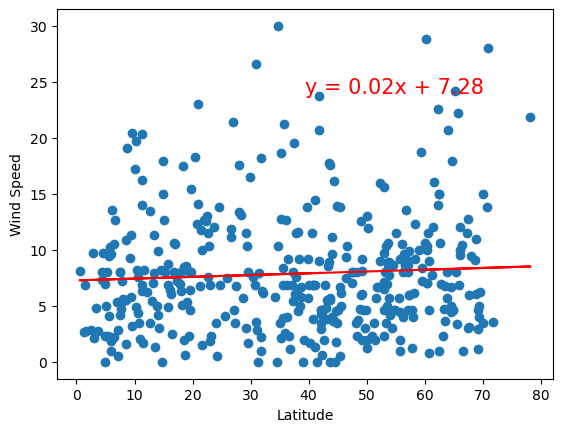

In [21]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r-value is: -0.20179045045200322


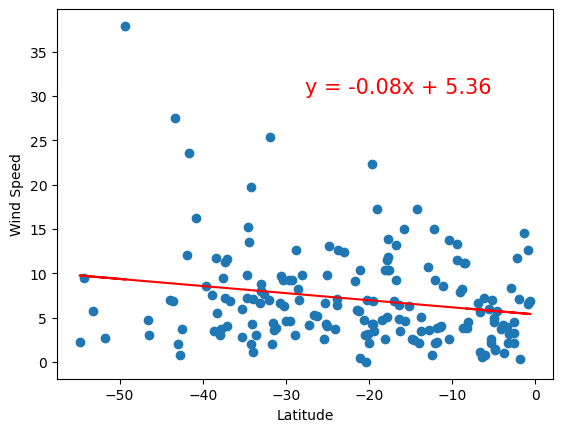

In [22]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** There is little relationship in the Northern Hemisphere, but a low negative relationship in the Southern Hemisphere